In [1]:
import numpy as np
from constants import DATA_DIR

from astrofit.model.enums import EnumSortOption
from astrofit.utils import (
    AsteroidLoader,
    LightcurveBinner,
    LightcurvePlotter,
    LightcurveSplitter,
)
from astrofit.utils.enums import BinningMethodEnum

In [2]:
asteroid_loader = AsteroidLoader(DATA_DIR)
lightcurve_binner = LightcurveBinner()
lightcurve_plotter = LightcurvePlotter()
lightcurve_splitter = LightcurveSplitter()

In [3]:
asteroids = sorted((
    asteroid_loader.load_asteroid(name) for name in asteroid_loader.available_asteroids
), key=lambda asteroid: asteroid.period)
asteroids

[Asteroid(id=353, name=Ruperto-Carola, period=2.738963, lightcurves=1),
 Asteroid(id=321, name=Florentina, period=2.8708658, lightcurves=11),
 Asteroid(id=390, name=Alma, period=3.741167, lightcurves=1),
 Asteroid(id=201, name=Penelope, period=3.747455, lightcurves=25),
 Asteroid(id=272, name=Antonia, period=3.854798, lightcurves=3),
 Asteroid(id=125, name=Liberatrix, period=3.968199, lightcurves=34),
 Asteroid(id=347, name=Pariana, period=4.052456, lightcurves=2),
 Asteroid(id=382, name=Dodona, period=4.113228, lightcurves=13),
 Asteroid(id=22, name=Kalliope, period=4.1482015, lightcurves=139),
 Asteroid(id=297, name=Caecilia, period=4.151389, lightcurves=8),
 Asteroid(id=16, name=Psyche, period=4.195948, lightcurves=187),
 Asteroid(id=354, name=Eleonora, period=4.277184, lightcurves=150),
 Asteroid(id=291, name=Alice, period=4.316011, lightcurves=9),
 Asteroid(id=281, name=Lucretia, period=4.349711, lightcurves=9),
 Asteroid(id=378, name=Holmia, period=4.440427, lightcurves=13),
 Ast

In [4]:
np.percentile([asteroid.period for asteroid in asteroids], [5, 25, 50, 75, 95])

array([ 4.5702364,  7.22439  , 10.86189  , 16.62174  , 35.61166  ])

In [13]:
asteroid, = [asteroid for asteroid in asteroids if asteroid.name == "Eunomia"]
asteroid

Asteroid(id=15, name=Eunomia, period=6.082754, lightcurves=107)

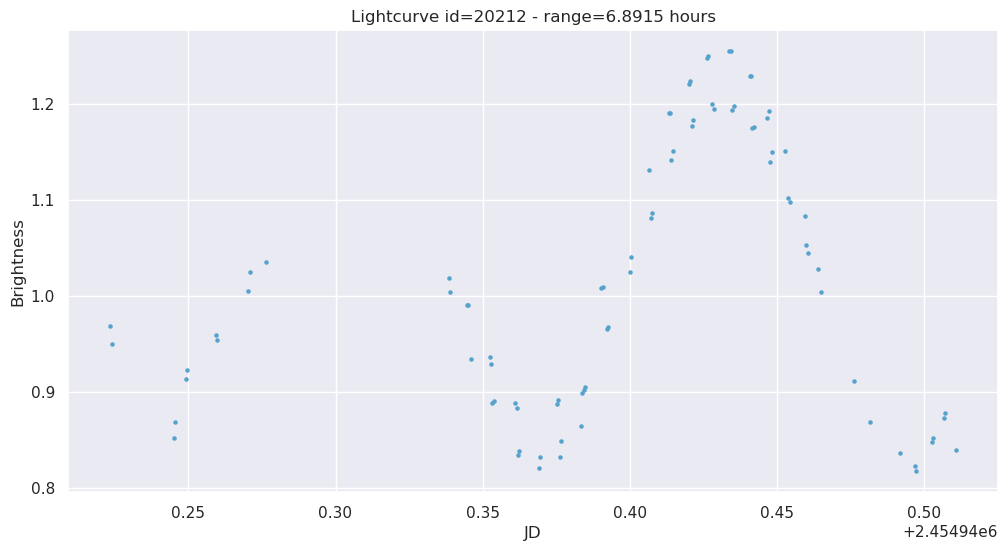

In [14]:
asteroid.get_longest_lightcurve(by=EnumSortOption.PERIOD).plot()

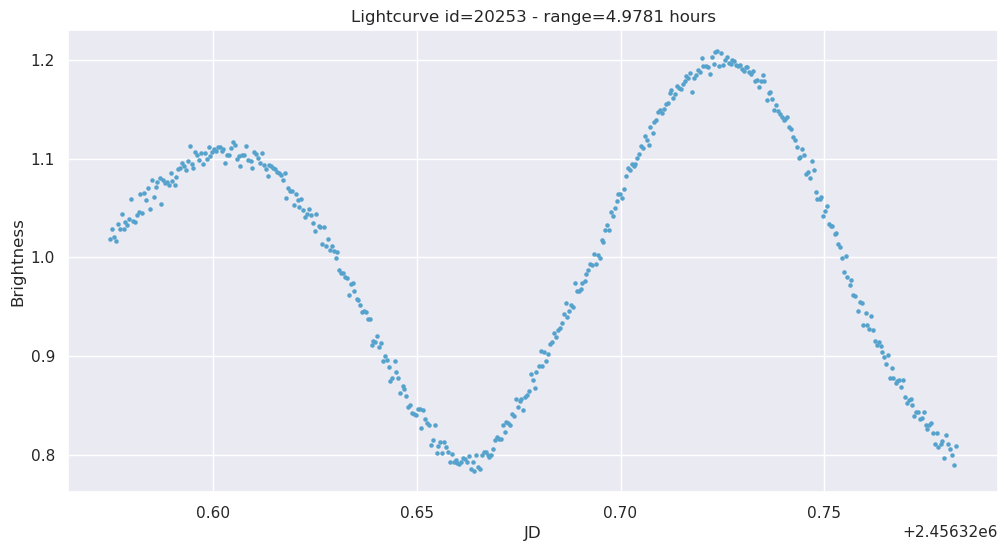

In [15]:
asteroid.get_longest_lightcurve(by=EnumSortOption.POINTS).plot()

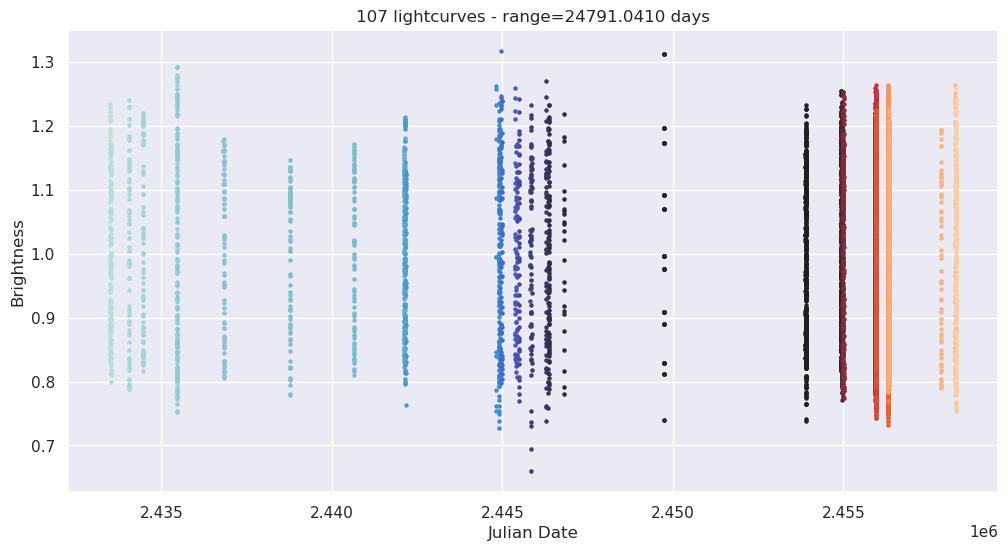

In [16]:
lightcurve_plotter.plot_lightcurves(asteroid.lightcurves, split_plots=False)

In [17]:
splitted = lightcurve_splitter.split_lightcurves(
    asteroid.lightcurves,
    max_hours_diff=24,
    min_no_points=10,
)
splitted

[Lightcurve(id=384, period=4.54889h points_count=85, first_JD=2433504.627269, last_JD=2433504.816806),
 Lightcurve(id=385, period=3.51689h points_count=69, first_JD=2433508.62303, last_JD=2433508.769567),
 Lightcurve(id=386, period=6.05369h points_count=67, first_JD=2434036.591406, last_JD=2434036.843643),
 Lightcurve(id=387, period=4.27997h points_count=71, first_JD=2434474.676486, last_JD=2434474.854818),
 Lightcurve(id=388, period=5.65970h points_count=66, first_JD=2435462.58043, last_JD=2435462.816251),
 Lightcurve(id=389, period=6.16963h points_count=90, first_JD=2435465.535225, last_JD=2435465.792293),
 Lightcurve(id=390, period=1.85388h points_count=24, first_JD=2435468.623212, last_JD=2435468.700457),
 Lightcurve(id=391, period=6.40205h points_count=80, first_JD=2436821.076065, last_JD=2436821.342817),
 Lightcurve(id=392, period=6.58303h points_count=76, first_JD=2438760.994487, last_JD=2438761.26878),
 Lightcurve(id=393, period=6.12305h points_count=72, first_JD=2440652.713909

In [20]:
bins = lightcurve_binner.bin_lightcurves(
    splitted,
    max_time_diff=45,
    binning_method=BinningMethodEnum.LAST_TO_FIRST_DIFF,
)
bins = sorted(bins, key=lambda bin: bin.points_count, reverse=True)
bins

[LightcurveBin(lightcurves=13, period=24.14826h, points=3553),
 LightcurveBin(lightcurves=15, period=17.11985h, points=2607),
 LightcurveBin(lightcurves=15, period=43.91697h, points=958),
 LightcurveBin(lightcurves=9, period=11.15077h, points=486),
 LightcurveBin(lightcurves=5, period=37.36199h, points=215),
 LightcurveBin(lightcurves=3, period=6.12003h, points=180),
 LightcurveBin(lightcurves=2, period=4.14230h, points=154),
 LightcurveBin(lightcurves=3, period=27.03721h, points=154),
 LightcurveBin(lightcurves=5, period=9.06087h, points=146),
 LightcurveBin(lightcurves=3, period=23.07224h, points=138),
 LightcurveBin(lightcurves=4, period=18.18790h, points=116),
 LightcurveBin(lightcurves=1, period=6.40205h, points=80),
 LightcurveBin(lightcurves=2, period=1.14788h, points=78),
 LightcurveBin(lightcurves=1, period=6.58303h, points=76),
 LightcurveBin(lightcurves=1, period=6.12305h, points=72),
 LightcurveBin(lightcurves=1, period=4.27997h, points=71),
 LightcurveBin(lightcurves=1, pe

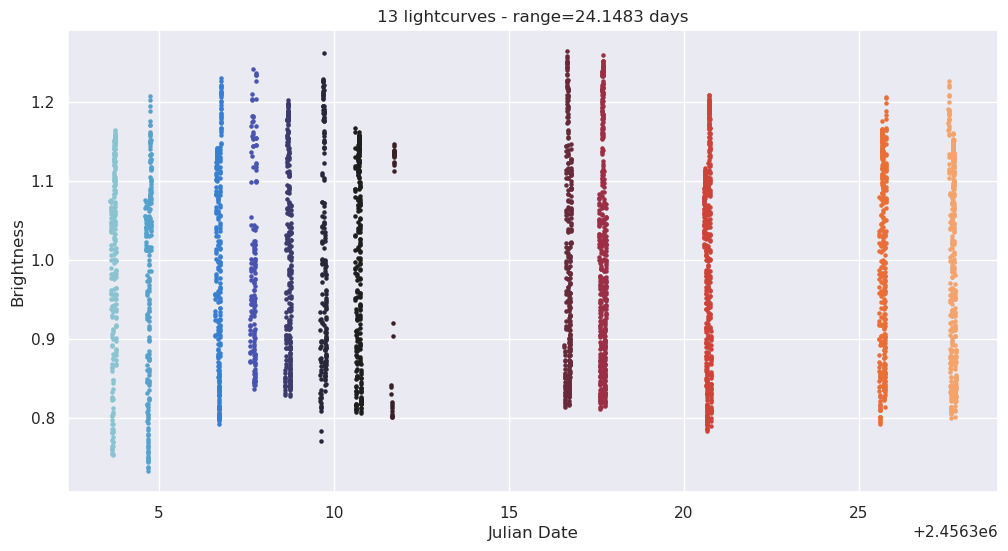

In [21]:
_bin = bins[0]
lightcurve_plotter.plot_lightcurves(_bin, split_plots=False)

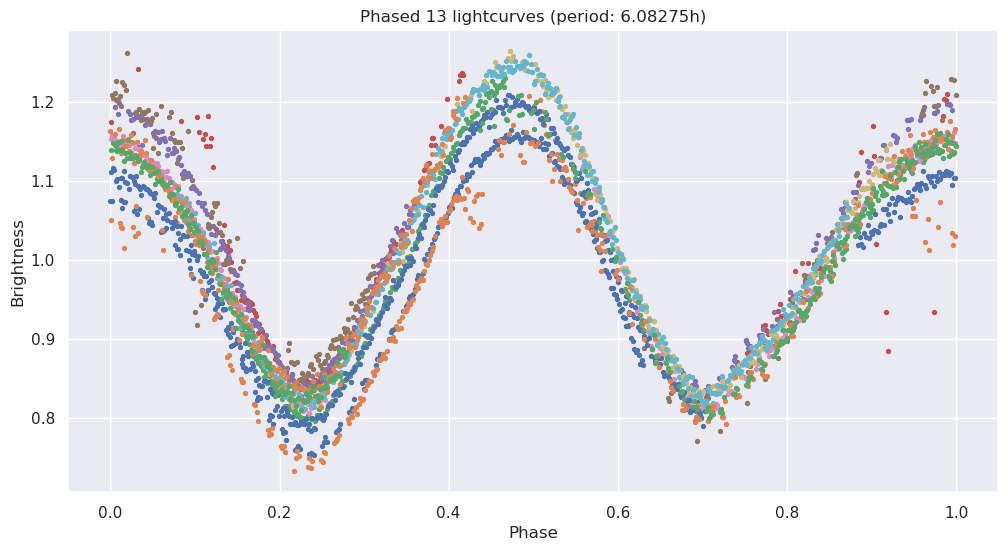

In [22]:
lightcurve_plotter.plot_phased_lightcurves(_bin, period=asteroid.period)

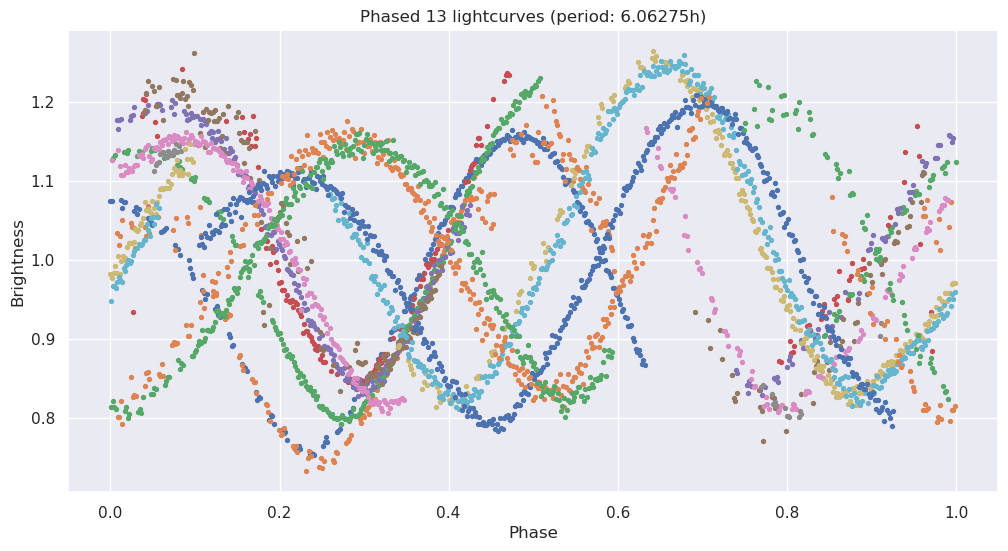

In [42]:
lightcurve_plotter.plot_phased_lightcurves(_bin, period=asteroid.period - 0.02)

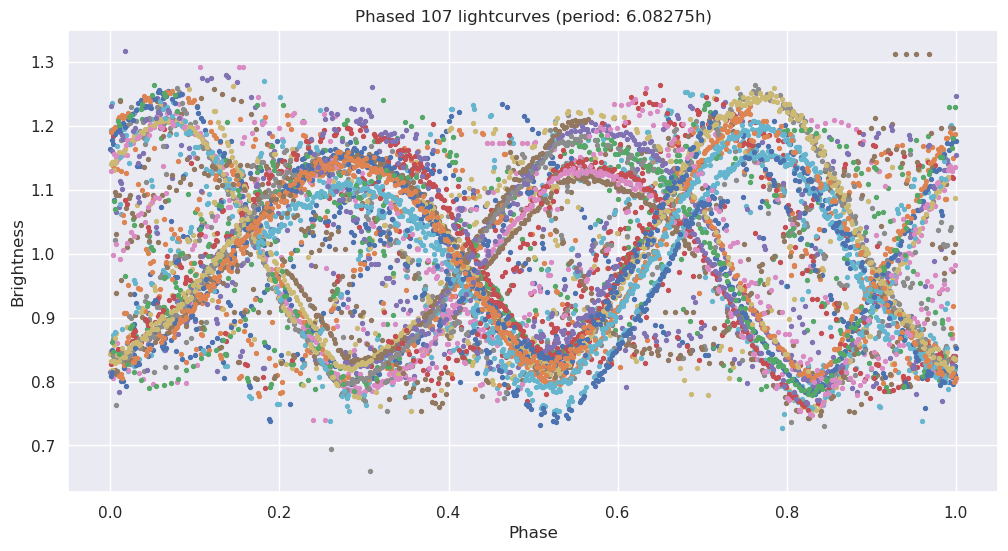

In [23]:
lightcurve_plotter.plot_phased_lightcurves(asteroid.lightcurves, period=asteroid.period)

In [30]:
_bin

LightcurveBin(lightcurves=13, period=24.14826h, points=3553)